# <a name="0">Machine Learning Accelerator - Computer Vision - Lecture 3</a>


## Predict with pre-trained Faster-RCNN model

This notebook shows how to play with pre-trained Faster-RCNN models with only a few
lines of code.

First let's import some necessary libraries:

In [1]:
! pip install -q nvidia-ml-py3==7.352.0
! pip install -q torch==1.10.1
! pip install -q torchvision==0.11.2
! pip install -q d2l==0.16.0
! pip install -q numpy==1.19.5

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import numpy as np
from torchvision import transforms
import torchvision
from torchvision.models.detection import fasterrcnn_mobilenet_v3_large_320_fpn

## 1. <a name="1">Downloading a Pretrained Model</a>
(<a href="#0">Go to top</a>)

We will download a pre-trained Faster-RCNN model from torchvision models. This model was previously trained on COCO (Common Objects in Context) dataset.

In [3]:
# Load a model pre-trained on COCO dataset
model = fasterrcnn_mobilenet_v3_large_320_fpn(pretrained=True)
model.eval()

Downloading: "https://download.pytorch.org/models/fasterrcnn_mobilenet_v3_large_320_fpn-907ea3f9.pth" to /home/ec2-user/.cache/torch/hub/checkpoints/fasterrcnn_mobilenet_v3_large_320_fpn-907ea3f9.pth


  0%|          | 0.00/74.2M [00:00<?, ?B/s]

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(320,), max_size=640, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (0): ConvNormActivation(
        (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): FrozenBatchNorm2d(16, eps=1e-05)
        (2): Hardswish()
      )
      (1): InvertedResidual(
        (block): Sequential(
          (0): ConvNormActivation(
            (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
            (1): FrozenBatchNorm2d(16, eps=1e-05)
            (2): ReLU(inplace=True)
          )
          (1): ConvNormActivation(
            (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d(16, eps=1e-05)
          )
        )
      )
      (2): InvertedResidual(
        (block): Sequen

Let's get our sample image on which we run this object detector.

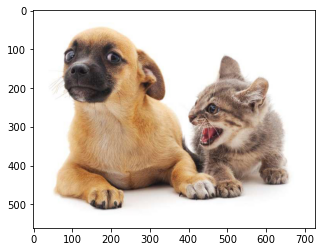

In [4]:
from PIL import Image

img = Image.open('../../data/catdog.jpg')
plt.imshow(np.array(img))
plt.show()

Like any other model in PyTorch, we apply transformation and send the image to the model for prediction.

In [5]:
transform = transforms.Compose([transforms.ToTensor()])
img = transform(np.array(img))
pred = model([img])

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Let's take a look at our predictions. We see a couple of boxes with their positions in the image (4 values), their labels and scores.

In [6]:
pred

[{'boxes': tensor([[ 55.6282,  48.1041, 442.0027, 514.3524],
          [375.1963, 117.4773, 653.3345, 483.5475],
          [ 55.1584,  53.3721, 466.1461, 505.0100],
          [  1.7240,  14.7005, 714.8975, 537.5667],
          [ 58.8278,  43.7374, 426.1044, 516.9794],
          [  0.0000,  35.0172, 728.0000, 539.4558]], grad_fn=<StackBackward0>),
  'labels': tensor([18, 17, 17, 65, 88, 15]),
  'scores': tensor([0.9936, 0.9921, 0.1664, 0.0704, 0.0692, 0.0578],
         grad_fn=<IndexBackward0>)}]

Let's plot the top 2 boxes from this list. We selected these boxes as they have significantly higher scores than the others.

In [7]:
# Select the top 2 boxes
boxes = pred[0]["boxes"].detach().numpy()[0:2, :].astype(int)

Here are these boxes

In [8]:
boxes

array([[ 55,  48, 442, 514],
       [375, 117, 653, 483]])

Code to plot them

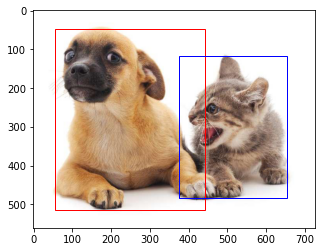

In [9]:
# Create figure and axes
fig, ax = plt.subplots()
ax.imshow(np.array(Image.open('../../data/catdog.jpg')))
# Create a Rectangle patch for the first box
rect = patches.Rectangle((boxes[0, 0], boxes[0, 1]),
                         boxes[0, 2]-boxes[0, 0],
                         boxes[0, 3]-boxes[0, 1],
                         edgecolor='r',
                         facecolor='none')
ax.add_patch(rect)

# Create a Rectangle patch for the second box
rect = patches.Rectangle((boxes[1, 0], boxes[1, 1]),
                         boxes[1, 2]-boxes[1, 0],
                         boxes[1, 3]-boxes[1, 1],
                         edgecolor='b',
                         facecolor='none')
ax.add_patch(rect)
plt.show()